# Packages

In [1]:
import os

import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bioat.lib.libpandas import set_option
from bioat.lib.libpath import HOME
from pybedtools import BedTool
set_option()

INFO  @ 2023-08-21 15:04:28 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-08-21 15:04:28 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-08-21 15:04:28 bioat.lib.libpandas.set_option: set pandas: display.max_columns=None
INFO  @ 2023-08-21 15:04:28 bioat.lib.libpandas.set_option: set pandas: display.max_rows=50


# classification for TAS-independent

## get df_arts

In [2]:
df_arts = pd.read_csv('../art_seqinfo/df_arts.csv')
df_arts

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182511,4182527,-,17,T,17,0,17,0,0,0,95.0,TACGCGGCGGGGCTGTC,|||||||||||||||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,0
1,chr9,129203049,129203171,chr9_129203099_129203121,chr9,129203129,129203145,-,8,T,13,4,17,0,4,0,87.0,TACGCGACAGAACTGTC,||||||.|.|..|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,1
2,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5022005,5022021,-,7,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,2
3,chr9,5021875,5022047,chr9_5021925_5021997,chr9,5022005,5022021,-,8,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,3
4,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182476,4182492,+,2,C,17,0,17,0,0,0,85.0,CCGGGAGGCCGCACTTG,|||||||||||||||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27132,chr16,89268826,89268947,chr16_89268876_89268897,chr16,89268919,89268935,-,43,C,8,9,8,9,0,0,4.0,CAGAGCAGGGCAGGGCC,|X||XX|X|X|XXX||X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27132
27133,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133
27134,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134
27135,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135


## get df_arts_tas_dep

In [3]:
df_arts_tas_dep = pd.read_csv('../art_seqinfo/df_arts_tas_dep.csv')
df_arts_tas_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102935,113102950,+,36,A,13,3,13,3,0,0,53.0,ATTAGACACAAAATAA,||||X|||||||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,2645
1,chr12,51595410,51595573,chr12_51595460_51595523,chr12,51595507,51595518,+,5,A,11,1,11,1,0,0,51.0,ATGGGCTTTGGA,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,3698
2,chr18,44726511,44726657,chr18_44726561_44726607,chr18,44726566,44726577,-,5,A,8,4,11,1,3,0,45.0,ATGAACTTTGAA,|||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,6384
3,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742480,45742495,+,-39,T,12,4,12,4,0,0,54.0,TTTAAAAACAAACAAG,X|||||X||||||X|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,2380
4,chr2,117786821,117786966,chr2_117786871_117786916,chr2,117786900,117786911,+,5,A,10,2,11,1,1,0,49.0,ATGAGCTTTGGG,|||.|||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Both,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,chr9,122264587,122264697,chr9_122264637_122264647,chr9,122264641,122264657,-,4,A,13,4,14,3,1,0,56.0,ACAGGAGGCCGCCCTCG,X|.|||||||||X||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,1978
1146,chr9,83274918,83275045,chr9_83274968_83274995,chr9,83274955,83274971,-,-13,C,13,4,15,2,2,0,63.0,CCTGGAAGCCACCCTTG,||X|||.|||.|X||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,605
1147,chr9,91161331,91161450,chr9_91161381_91161400,chr9,91161422,91161438,-,41,C,13,4,14,3,1,0,56.0,CCAGGAGGACGCACAGG,||.|||||X|||||XX|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,1814
1148,chrX,138128161,138128287,chrX_138128211_138128237,chrX,138128167,138128183,+,54,C,13,4,13,4,0,0,49.0,CAGGGAGGGTGTACTTG,|X||||||XX|X|||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Right,4555


## TAS-independent off-target

In [4]:
# 刨除tas dep
df_arts_rm_tas_dep = df_arts[df_arts['id'].map(lambda x: x not in df_arts_tas_dep['id'].tolist())].copy()
df_arts_rm_tas_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182511,4182527,-,17,T,17,0,17,0,0,0,95.0,TACGCGGCGGGGCTGTC,|||||||||||||||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,0
2,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5022005,5022021,-,7,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,2
4,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182476,4182492,+,2,C,17,0,17,0,0,0,85.0,CCGGGAGGCCGCACTTG,|||||||||||||||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,4
5,chr9,5021875,5022047,chr9_5021925_5021997,chr9,5021972,5021988,+,9,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,5
6,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5021972,5021988,+,10,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27132,chr16,89268826,89268947,chr16_89268876_89268897,chr16,89268919,89268935,-,43,C,8,9,8,9,0,0,4.0,CAGAGCAGGGCAGGGCC,|X||XX|X|X|XXX||X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27132
27133,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133
27134,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134
27135,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135


#### get overlapped region with ctcf

In [5]:
index_rm_tas_dep = df_arts_rm_tas_dep['region_index'].unique().tolist()
index_rm_tas_dep[:10]

['chr19_4182494_4182519',
 'chr9_5021998_5022096',
 'chr9_5021925_5021997',
 'chr11_2630829_2630903',
 'chr2_88149212_88149266',
 'chr9_69698553_69698603',
 'chr10_33333995_33334044',
 'chr13_52534773_52534853',
 'chrX_20442161_20442201',
 'chr13_51305640_51305728']

In [6]:
df_ctcf = pd.read_csv(f'{HOME}/1.database/public_data/CTCF_ATAC_data/ENCFF285QVL_CTCF_binding_sites_fix_range.bed',
                      sep='\t')
df_ctcf.info()

coor_ctcf_bed = BedTool.from_dataframe(df_ctcf.iloc[:, :3])
coor_ctcf_bed.to_dataframe()

coor_ctcf_bed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38035 entries, 0 to 38034
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   chrom   38035 non-null  object 
 1   start   38035 non-null  int64  
 2   end     38035 non-null  int64  
 3   name    38035 non-null  object 
 4   RPKM    38035 non-null  float64
 5   strand  38035 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ MB


<BedTool(/var/folders/79/yd907p9x4537vqhgfrm0md680000gn/T/pybedtools.qmi30b50.tmp)>

In [7]:
coor_rm_tas_dep = pd.Series(index_rm_tas_dep).str.split('_', expand=True)
coor_rm_tas_dep.columns = ['chrom', 'start', 'end']
coor_rm_tas_dep[['start', 'end']] = coor_rm_tas_dep[['start', 'end']].astype(int)
coor_rm_tas_dep

,chrom,start,end
0,chr19,4182494,4182519
1,chr9,5021998,5022096
2,chr9,5021925,5021997
3,chr11,2630829,2630903
4,chr2,88149212,88149266
...,...,...,...
12802,chr1,10523435,10523475
12803,chr16,48609361,48609384
12804,chr3,22939128,22939165
12805,chrX,152959075,152959082


In [8]:
coor_rm_tas_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12807 entries, 0 to 12806
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chrom   12807 non-null  object
 1   start   12807 non-null  int64 
 2   end     12807 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 300.3+ KB


In [9]:
# print(coor_ctcf_bed)
rm_tas_dep_bed = BedTool.from_dataframe(coor_rm_tas_dep)
# print(rm_tas_dep_bed)

In [10]:
# DEBUG for pybedtools
# from pybedtools import BedTool

# import os; print(os.getenv('PATH'))

In [11]:
df_coor_intersect = rm_tas_dep_bed.intersect(coor_ctcf_bed, loj=True).to_dataframe()
df_coor_intersect.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']
df_coor_tas_indep = df_coor_intersect.query('start2 != -1').drop_duplicates(subset=['chrom1', 'start1', 'end1'])
df_coor_unassorted = df_coor_intersect.query('start2 == -1').drop_duplicates(subset=['chrom1', 'start1', 'end1'])

In [12]:
df_coor_tas_indep

,chrom1,start1,end1,chrom2,start2,end2
23,chr17,19513972,19514031,chr17,19513874,19514298
48,chr4,84498427,84498432,chr4,84498014,84498438
88,chr19,39996736,39996808,chr19,39996424,39996848
169,chr5,137605653,137605678,chr5,137605376,137605800
301,chr19,32464509,32464541,chr19,32464259,32464683
...,...,...,...,...,...,...
12847,chr1,9428668,9428729,chr1,9428572,9428996
12850,chr19,3822057,3822071,chr19,3821890,3822314
12851,chr16,67419920,67419975,chr16,67419877,67420301
12855,chrX,152959075,152959082,chrX,152958951,152959129


In [13]:
df_coor_unassorted

,chrom1,start1,end1,chrom2,start2,end2
0,chr19,4182494,4182519,.,-1,-1
1,chr9,5021998,5022096,.,-1,-1
2,chr9,5021925,5021997,.,-1,-1
3,chr11,2630829,2630903,.,-1,-1
4,chr2,88149212,88149266,.,-1,-1
...,...,...,...,...,...,...
12848,chr2,22882093,22882127,.,-1,-1
12849,chr17,57697813,57697893,.,-1,-1
12852,chr1,10523435,10523475,.,-1,-1
12853,chr16,48609361,48609384,.,-1,-1


In [14]:
index_tas_indep = df_coor_tas_indep[['chrom1', 'start1', 'end1']].apply(lambda x: '_'.join(x.astype(str)),
                                                                        axis=1).to_list()
index_unassorted = df_coor_unassorted[['chrom1', 'start1', 'end1']].apply(lambda x: '_'.join(x.astype(str)),
                                                                          axis=1).to_list()

In [15]:
index_tas_indep[:10]

['chr17_19513972_19514031',
 'chr4_84498427_84498432',
 'chr19_39996736_39996808',
 'chr5_137605653_137605678',
 'chr19_32464509_32464541',
 'chr9_130835508_130835532',
 'chr11_112025244_112025263',
 'chr21_41121991_41122008',
 'chr19_58573014_58573054',
 'chr6_168023096_168023129']

In [16]:
index_unassorted[:10]

['chr19_4182494_4182519',
 'chr9_5021998_5022096',
 'chr9_5021925_5021997',
 'chr11_2630829_2630903',
 'chr2_88149212_88149266',
 'chr9_69698553_69698603',
 'chr10_33333995_33334044',
 'chr13_52534773_52534853',
 'chrX_20442161_20442201',
 'chr13_51305640_51305728']

In [17]:
# 已经去除了TAS DEP，现在取CTCF overlap, 注意，用的是df_arts_rm_tas_dep！！
df_arts_tas_indep = df_arts_rm_tas_dep.query('region_index in @index_tas_indep').copy()
df_arts_unassorted = df_arts_rm_tas_dep.query('region_index in @index_unassorted').copy()

In [18]:
df_arts_tas_indep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
46,chr17,19513922,19514081,chr17_19513972_19514031,chr17,19514039,19514055,-,8,T,11,6,16,1,5,0,76.0,TAGACAGCGAAACTGTC,||X.|.|||...|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,46
108,chr4,84498377,84498482,chr4_84498427_84498432,chr4,84498402,84498418,+,9,T,12,5,15,2,3,0,71.0,TGCGCAGCAGAGATGTC,|X|||.||.|.|X||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,108
148,chr19,39996686,39996858,chr19_39996736_39996808,chr19,39996785,39996801,+,7,T,12,5,15,2,3,0,71.0,TACACGCCGGGACTACC,|||.||X||||.||.X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,148
233,chr5,137605603,137605728,chr5_137605653_137605678,chr5,137605627,137605643,+,10,T,11,6,15,2,4,0,69.0,TACAGGGCAGAACTGAC,|||.X|||.|..|||X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,Left,233
435,chr19,32464459,32464591,chr19_32464509_32464541,chr19,32464519,32464535,+,6,T,9,8,15,2,6,0,65.0,TACAAAGCAAAACTGTA,|||.X.||....||||X,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Left,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27131,chr11,66282584,66282698,chr11_66282634_66282648,chr11,66282648,66282664,-,14,C,8,9,8,9,0,0,4.0,CCACATGTGGCCGCCAG,|||XX|X||X|XX|XXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27131
27133,chr3,47475992,47476103,chr3_47476042_47476053,chr3,47476065,47476081,-,23,C,8,9,8,9,0,0,4.0,CCATACTTCCCTCCGGT,||||XXX|XX|XX||XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27133
27134,chr6,30556597,30556713,chr6_30556647_30556663,chr6,30556692,30556708,-,29,C,8,9,8,9,0,0,4.0,CCACTAAGGTCAAGCCC,|||X|XXX||||XXXXX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Right,27134
27135,chr15,68651206,68651327,chr15_68651256_68651277,chr15,68651272,68651287,-,16,G,7,9,7,9,0,0,-1.0,GCCCAGCCCTGACCAC,XXXX|X|X|XX||X||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27135


In [19]:
df_arts_unassorted.to_csv('../art_seqinfo/df_arts_unassorted.csv', index=False)
df_arts_unassorted

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182511,4182527,-,17,T,17,0,17,0,0,0,95.0,TACGCGGCGGGGCTGTC,|||||||||||||||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,0
2,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5022005,5022021,-,7,C,17,0,17,0,0,0,85.0,CCATTTCTGTCATCGTA,|||||||||||||||||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,2
4,chr19,4182444,4182569,chr19_4182494_4182519,chr19,4182476,4182492,+,2,C,17,0,17,0,0,0,85.0,CCGGGAGGCCGCACTTG,|||||||||||||||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...,DetectSeq_SIRT6-DddA11_REP-2,on-target: SIRT6,4
5,chr9,5021875,5022047,chr9_5021925_5021997,chr9,5021972,5021988,+,9,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,5
6,chr9,5021948,5022146,chr9_5021998_5022096,chr9,5021972,5021988,+,10,C,17,0,17,0,0,0,85.0,CTGAAAAAGACTCTGCA,|||||||||||||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,on-target: JAK2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27116,chr12,119020881,119021002,chr12_119020931_119020952,chr12,119020986,119021001,-,34,A,8,8,8,8,0,0,8.0,AGAACACAGCGCCTCC,|XX|X|||XXXX||X|,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,27116
27117,chr14,72104166,72104275,chr14_72104216_72104225,chr14,72104242,72104258,-,17,G,6,11,9,8,3,0,7.0,GGAAAAGCAAGACAACG,XX.|||XX.|XX|X.|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Left,27117
27125,chr2,236178158,236178271,chr2_236178208_236178221,chr2,236178168,236178184,+,24,T,7,10,7,10,0,0,5.0,TTCGCTCCCACTGGGCA,X|XXXXXXX|||XX|||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Left,27125
27130,chr10,123135225,123135335,chr10_123135275_123135285,chr10,123135262,123135278,-,-13,G,8,9,8,9,0,0,4.0,GCGGACCAGGCCCTCCC,XX|X|XX||X|X||X|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_T...,DetectSeq_JAK2-DddA11_REP-1,Left,27130


In [20]:
print(f'df_arts_tas_dep.shape[0] = {df_arts_tas_dep.shape[0]}')
print(f'df_arts_tas_indep.shape[0] = {df_arts_tas_indep.shape[0]}')
print(f'df_arts_unassorted.shape[0] = {df_arts_unassorted.shape[0]}')
print(f'total = {df_arts_tas_dep.shape[0] + df_arts_tas_indep.shape[0] + df_arts_unassorted.shape[0]}')
print(f'df_arts.shape[0] = {df_arts.shape[0]}')

df_arts_tas_dep.shape[0] = 1150
df_arts_tas_indep.shape[0] = 3040
df_arts_unassorted.shape[0] = 22947
total = 27137
df_arts.shape[0] = 27137


In [21]:
# 完美！

# df_arts_tas_dep.shape[0] = 1150
# df_arts_tas_indep.shape[0] = 3040
# df_arts_unassorted.shape[0] = 22947
# total = 27137
# df_arts.shape[0] = 27137

# if you are from step 12, start from here!!!

In [75]:
# df_arts_tas_indep = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq.csv')
df_arts_tas_indep = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq_v2.csv')
df_arts_tas_indep.drop(columns='sequence', inplace=True)
df_arts_tas_indep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,10,6,10,6,0,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13668
1,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,10,6,10,6,0,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13957
2,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,6,6,8,4,2,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,20314
3,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,5,7,8,4,3,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,22241
4,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,6,6,9,3,3,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,23362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,11,6,11,6,0,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27118
4182,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,7,10,7,10,0,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27122
4183,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,7,10,7,10,0,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27124
4184,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,8,9,8,9,0,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27129


### Final TAS-independent off-target

In [76]:
df_arts_tas_indep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,10,6,10,6,0,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13668
1,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,10,6,10,6,0,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13957
2,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,6,6,8,4,2,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,20314
3,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,5,7,8,4,3,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,22241
4,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,6,6,9,3,3,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,23362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,11,6,11,6,0,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27118
4182,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,7,10,7,10,0,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27122
4183,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,7,10,7,10,0,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27124
4184,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,8,9,8,9,0,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27129


### get Seqinfo for TAS-independent off-target

用来生成weblogo（使用sublime或者cut -c 1-x 完成trim，修剪到长度一致）

#### tas-indep ± 200 bp to call motif

In [77]:
df_coor_tas_indep = pd.Series(df_arts_tas_indep['region_index'].unique()).str.split('_', expand=True)
df_coor_tas_indep.columns = ['chrom', 'start', 'end']
# 为了查找CTCF的motif，前后扩展200BP
df_coor_tas_indep[['start', 'end']] = df_coor_tas_indep[['start', 'end']].astype(int)
df_coor_tas_indep['start'] = df_coor_tas_indep['start'] - 200
df_coor_tas_indep['end'] = df_coor_tas_indep['end'] + 200
df_coor_tas_indep

,chrom,start,end
0,chr14,70713986,70714400
1,chr12,108063143,108063581
2,chr7,90595339,90595771
3,chr11,124071331,124071749
4,chr4,21765769,21766235
...,...,...,...
3069,chr1,9428468,9428929
3070,chr19,3821857,3822271
3071,chr16,67419720,67420175
3072,chrX,152958875,152959282


<Axes: >

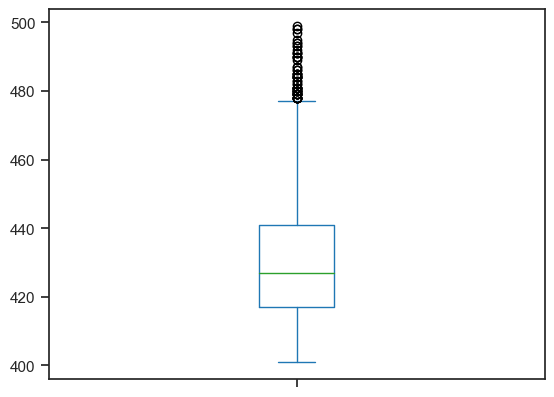

In [78]:
(df_coor_tas_indep['end'] - df_coor_tas_indep['start']).plot(kind='box')

In [79]:
bed_tas_indep = BedTool().from_dataframe(df_coor_tas_indep)
bed_tas_indep
# print(bed_tas_indep)

<BedTool(/var/folders/79/yd907p9x4537vqhgfrm0md680000gn/T/pybedtools.fmsbd5ys.tmp)>

#### getfasta use bed obj and genome.fa ± 200bp

In [80]:
# 指定参考基因组序列信息，并从中获取每个序列信息
fasta_tas_indep = bed_tas_indep.getfasta(
    fi=f'{HOME}/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa')

# 将region序列信息转为dataframe
df_seqinfo_tas_indep = pd.DataFrame(fasta_tas_indep.print_sequence().split('>')[1:], columns=['info'])
df_seqinfo_tas_indep[['coordinate', 'sequence']] = df_seqinfo_tas_indep['info'].str.strip().str.split('\n', expand=True)

# 去掉序列中含有N的 region（可能坐落于端粒或中性粒，影响分析）
df_seqinfo_tas_indep = df_seqinfo_tas_indep.query('~sequence.str.upper().str.contains("N")').copy()

# 整理dataframe
df_seqinfo_tas_indep[['ctcf_chrom', 'ctcf_start', 'ctcf_end']] = (
    df_seqinfo_tas_indep['coordinate']
    .str.replace(':', '\t')
    .str.replace('-', '\t')
    .str.split('\t', expand=True)
)
df_seqinfo_tas_indep[['ctcf_start', 'ctcf_end']] = df_seqinfo_tas_indep[['ctcf_start', 'ctcf_end']].astype(int)
df_seqinfo_tas_indep = df_seqinfo_tas_indep[['ctcf_chrom', 'ctcf_start', 'ctcf_end', 'sequence']].copy()
df_seqinfo_tas_indep['sequence'] = df_seqinfo_tas_indep['sequence'].str.upper()
df_seqinfo_tas_indep['region_index'] = (
        df_seqinfo_tas_indep['ctcf_chrom']
        + '_'
        + (df_seqinfo_tas_indep['ctcf_start'] + 200).astype(str)
        + '_'
        + (df_seqinfo_tas_indep['ctcf_end'] - 200).astype(str)
)
# df_seqinfo_tas_indep
df_arts_tas_indep_add_seq = pd.merge(df_arts_tas_indep, df_seqinfo_tas_indep, on='region_index', how='left')
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
0,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,10,6,10,6,0,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13668,chr14,70713986,70714400,ATCTACTCATCTAATTTAGATTGTAGAAACCTATTG...
1,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,10,6,10,6,0,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13957,chr12,108063143,108063581,CACAAATCCACATGGCCATGAATTCTTCTTAAAATT...
2,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,6,6,8,4,2,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,20314,chr7,90595339,90595771,TCTGTTTTTGAGGTGGGGGAAAAGGAGGTCGGAATC...
3,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,5,7,8,4,3,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,22241,chr11,124071331,124071749,TCTACAAATTGTGTACCATTACAGGAATTTTCATTT...
4,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,6,6,9,3,3,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,23362,chr4,21765769,21766235,TTCCTTCCACAGAATCCCTCAGGACCCAGAGATCTT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,11,6,11,6,0,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27118,chr20,36808512,36808941,CTCGAGGAAGTCATCCCCTTCGCTGGGCAAAACCTT...
4182,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,7,10,7,10,0,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27122,chr19,3821857,3822271,CTTGGCCTCCCAAAGTGCTGGGATGATAGACGTGAG...
4183,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,7,10,7,10,0,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27124,chr3,40584520,40584937,TTGAACGGGACAATGTGTAACGCTGAGGCCCAGGCC...
4184,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,8,9,8,9,0,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27129,chr8,61139009,61139423,TTGAGAACTGCTAGAAGCACCCGCGCTGCGGGAAGA...


In [81]:
# True的话说明合并没问题
df_arts_tas_indep_add_seq['id'].sort_values().tolist() == df_arts_tas_indep['id'].sort_values().tolist()

True

In [82]:
os.makedirs('../art_seqinfo/tas-independent', exist_ok=True)

In [83]:
for sample, df in df_arts_tas_indep_add_seq.groupby('<sample>'):
    # 上面的duplication都是0则说明duplication是TAS-Dep_stat alignment过程引入的，简单去重即可
    print(f'df.shape[0] = {df.shape[0]}')
    print('查看是否有duplication', df.duplicated(subset='region_index').sum())

print('=' * 20)
for g, df in df_arts_tas_indep_add_seq.groupby(['<sample>', 'TAS-Dep_stat']):
    sample, dep_stat = g
    print(f'df.shape[0] = {df.shape[0]}')
    print('查看是否有duplication', df.duplicated(subset='region_index').sum())
    # 上面的duplication都是0则说明duplication是TAS-Dep_stat alignment过程引入的，简单去重即可

# df.shape[0] = 78
# 查看是否有duplication 26
# df.shape[0] = 49
# 查看是否有duplication 15
# df.shape[0] = 6
# 查看是否有duplication 0
# df.shape[0] = 718
# 查看是否有duplication 290
# df.shape[0] = 245
# 查看是否有duplication 62
# df.shape[0] = 1069
# 查看是否有duplication 458
# df.shape[0] = 875
# 查看是否有duplication 351
# ====================
# df.shape[0] = 49
# 查看是否有duplication 0
# df.shape[0] = 29
# 查看是否有duplication 0
# df.shape[0] = 33
# 查看是否有duplication 0
# df.shape[0] = 16
# 查看是否有duplication 0
# df.shape[0] = 5
# 查看是否有duplication 0
# df.shape[0] = 1
# 查看是否有duplication 0
# df.shape[0] = 376
# 查看是否有duplication 0
# df.shape[0] = 342
# 查看是否有duplication 0
# df.shape[0] = 102
# 查看是否有duplication 0
# df.shape[0] = 143
# 查看是否有duplication 0
# df.shape[0] = 527
# 查看是否有duplication 0
# df.shape[0] = 542
# 查看是否有duplication 0
# df.shape[0] = 431
# 查看是否有duplication 0
# df.shape[0] = 444
# 查看是否有duplication 0

df.shape[0] = 63
查看是否有duplication 0
df.shape[0] = 39
查看是否有duplication 0
df.shape[0] = 8
查看是否有duplication 0
df.shape[0] = 645
查看是否有duplication 0
df.shape[0] = 319
查看是否有duplication 0
df.shape[0] = 1176
查看是否有duplication 0
df.shape[0] = 1936
查看是否有duplication 0
df.shape[0] = 28
查看是否有duplication 0
df.shape[0] = 35
查看是否有duplication 0
df.shape[0] = 24
查看是否有duplication 0
df.shape[0] = 15
查看是否有duplication 0
df.shape[0] = 6
查看是否有duplication 0
df.shape[0] = 2
查看是否有duplication 0
df.shape[0] = 405
查看是否有duplication 0
df.shape[0] = 240
查看是否有duplication 0
df.shape[0] = 141
查看是否有duplication 0
df.shape[0] = 178
查看是否有duplication 0
df.shape[0] = 724
查看是否有duplication 0
df.shape[0] = 452
查看是否有duplication 0
df.shape[0] = 1480
查看是否有duplication 0
df.shape[0] = 456
查看是否有duplication 0


In [84]:
# 查看重复的来源
(
    df_arts_tas_indep_add_seq
    .query('region_index=="chr1_2044988_2044998"')
    .sort_values(['chrom', 'start', 'end', 'align_chr_start'])
)

# DetectSeq_JAK2-DddA11 _REP-2 Right
# DetectSeq_SIRT6-DddA11_REP-1 Right
# DetectSeq_JAK2-DddA11 _REP-2 Left
# DetectSeq_SIRT6-DddA11_REP-1 Left

# 所以重复是合理的

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
4165,chr1,2044938,2045048,chr1_2044988_2044998,chr1,2044960,2044976,+,12,C,8,9,9,8,1,0,11.0,CCAGCCCGAGCCCCGTC,|||XXX|X.X|XX|||X,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27070,chr1,2044788,2045198,AAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCA...
3111,chr1,2044938,2045048,chr1_2044988_2044998,chr1,2044992,2045008,-,4,C,11,6,12,5,1,0,38.0,CCAGGAGGGGGCGCAGG,||.|||||XX||X|XX|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-1_...,DetectSeq_SIRT6-DddA11_REP-1,Right,12006,chr1,2044788,2045198,AAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCA...


In [85]:
def get_fasta(x):
    region_index = x['region_index']
    c_chrom = x['ctcf_chrom']
    c_start = x['ctcf_start']
    c_end = x['ctcf_end']
    seq = x['sequence']
    return f'>region_index:{region_index}; query_seq_index:{c_chrom}_{c_start}_{c_end}\n{seq}\n'


for sample, df in df_arts_tas_indep_add_seq.groupby('<sample>'):
    # 上面的一个cell中的代码已经证明了duplication是TAS-Dep_stat alignment过程引入的，简单去重即可
    df = df.drop_duplicates(subset=['region_index'], keep='first')
    text = ''.join(df.apply(get_fasta, axis=1).tolist())
    with open(f'../art_seqinfo/tas-independent/seqinfo_{sample}_independent.fa', 'wt') as f:
        f.write(text)
# wc -l *.fa
# 108 seqinfo_DetectSeq_ATP8-DddA11_REP-1_independent.fa
# 82 seqinfo_DetectSeq_ATP8-DddA6_REP-1_independent.fa
# 18 seqinfo_DetectSeq_ATP8-DddAwt_REP-1_independent.fa
# 860 seqinfo_DetectSeq_JAK2-DddA11_REP-1_independent.fa
# 372 seqinfo_DetectSeq_JAK2-DddA11_REP-2_independent.fa
# 1244 seqinfo_DetectSeq_SIRT6-DddA11_REP-1_independent.fa
# 1062 seqinfo_DetectSeq_SIRT6-DddA11_REP-2_independent.fa
# 3746 total

# for i in `ls *.fa`
# echo `uniq $i | wc -l`
# 108
# 82
# 18
# 860
# 372
# 1244
# 1062


# total=3746/2=1873

In [86]:
df_arts_tas_indep_add_seq = df_arts_tas_indep_add_seq.drop_duplicates(subset=['region_index', '<sample>'])
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
0,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,10,6,10,6,0,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13668,chr14,70713986,70714400,ATCTACTCATCTAATTTAGATTGTAGAAACCTATTG...
1,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,10,6,10,6,0,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13957,chr12,108063143,108063581,CACAAATCCACATGGCCATGAATTCTTCTTAAAATT...
2,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,6,6,8,4,2,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,20314,chr7,90595339,90595771,TCTGTTTTTGAGGTGGGGGAAAAGGAGGTCGGAATC...
3,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,5,7,8,4,3,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,22241,chr11,124071331,124071749,TCTACAAATTGTGTACCATTACAGGAATTTTCATTT...
4,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,6,6,9,3,3,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,23362,chr4,21765769,21766235,TTCCTTCCACAGAATCCCTCAGGACCCAGAGATCTT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,11,6,11,6,0,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27118,chr20,36808512,36808941,CTCGAGGAAGTCATCCCCTTCGCTGGGCAAAACCTT...
4182,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,7,10,7,10,0,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27122,chr19,3821857,3822271,CTTGGCCTCCCAAAGTGCTGGGATGATAGACGTGAG...
4183,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,7,10,7,10,0,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27124,chr3,40584520,40584937,TTGAACGGGACAATGTGTAACGCTGAGGCCCAGGCC...
4184,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,8,9,8,9,0,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27129,chr8,61139009,61139423,TTGAGAACTGCTAGAAGCACCCGCGCTGCGGGAAGA...


In [87]:
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
0,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,10,6,10,6,0,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13668,chr14,70713986,70714400,ATCTACTCATCTAATTTAGATTGTAGAAACCTATTG...
1,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,10,6,10,6,0,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13957,chr12,108063143,108063581,CACAAATCCACATGGCCATGAATTCTTCTTAAAATT...
2,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,6,6,8,4,2,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,20314,chr7,90595339,90595771,TCTGTTTTTGAGGTGGGGGAAAAGGAGGTCGGAATC...
3,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,5,7,8,4,3,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,22241,chr11,124071331,124071749,TCTACAAATTGTGTACCATTACAGGAATTTTCATTT...
4,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,6,6,9,3,3,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,23362,chr4,21765769,21766235,TTCCTTCCACAGAATCCCTCAGGACCCAGAGATCTT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,11,6,11,6,0,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27118,chr20,36808512,36808941,CTCGAGGAAGTCATCCCCTTCGCTGGGCAAAACCTT...
4182,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,7,10,7,10,0,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27122,chr19,3821857,3822271,CTTGGCCTCCCAAAGTGCTGGGATGATAGACGTGAG...
4183,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,7,10,7,10,0,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27124,chr3,40584520,40584937,TTGAACGGGACAATGTGTAACGCTGAGGCCCAGGCC...
4184,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,8,9,8,9,0,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27129,chr8,61139009,61139423,TTGAGAACTGCTAGAAGCACCCGCGCTGCGGGAAGA...


### Motif analysis
see file **meme_chip_step_by_step.sh**
```bash
DIR=/home/zhaohuanan/0.apps/meme_suite/meme-5.5.3
export PATH=$DIR/bin:$DIR/libexec/meme-5.5.3:$PATH

mkdir -p \
    motif_pre_processing \
	motif_discovery/meme \
	motif_discovery/streme \
	motif_scanning/fimo \
    motif_comparison/tomtom \
    motif_enrichment/centrimo \
    motif_enrichment/spamo


for i in `ls *.fa`
# for i in seqinfo_DetectSeq_ATP8-DddA11_REP-1_independent.fa  # for test
do
    ########################################
    #### files ####
    ########################################
    # motif_pre_processing
    SEQ_LENGTH=400
    METRICS=motif_pre_processing/${i}.metrics
    SEQ_CENTERED=motif_pre_processing/${i}.seq_centered
    BFILE=motif_pre_processing/${i}.background
    
    ### Motif Discovery
    ### 预测输入序列上的motif信息
    ### de novo motif discovery
    MEME=motif_discovery/meme/$i
    STREME=motif_discovery/streme/$i

    ### Motif Enrichment
    ### 分析已知的motif在输入序列上的富集情况
    CENTRIMO=motif_enrichment/centrimo/$i
    SPAMO=motif_enrichment/spamo/$i

    # ### Motif Scanning
    # ### 分析输入序列上可能的motif出现的位置
    FIMO=motif_scanning/fimo/$i
    
    # ### Motif Comparison
    # ### 比较不同motif之间的相似性
    TOMTOM=motif_comparison/tomtom/${i}
    

    
    echo '===================================================>'
	echo 'pre-processing' # √
    echo '===================================================>'
	getsize $i 1> $METRICS
	fasta-most -min 50 < $i 1>> $METRICS  # test
	fasta-center -dna -len $SEQ_LENGTH < $i 1> $SEQ_CENTERED
	fasta-get-markov -nostatus -nosummary -dna -m 2 $i $BFILE

 
    echo '===================================================>'
	echo 'Motif Discovery: de novo motif discovery' # √
    echo '===================================================>'
	echo -e '\trun MEME'
	meme -dna -nmotifs 3 -maxw 50 -bfile $BFILE -revcomp -oc $MEME $i
    # nmotifs: 最多报告3个motifs
    # revcomp: allow sites on + or - DNA strands
    # nostatus: do not print progress reports to terminal
    
	echo -e '\trun STREME'
	streme -dna --nmotifs 3 --maxw 30 --p $SEQ_CENTERED --oc $STREME
    # STREME: The maximum allowed motif width is 30


    echo '===================================================>'
	echo 'Motif Enrichment: 分析已知的motif在输入序列上的富集情况' # √
    echo '===================================================>'
    echo -e '\trun CentiMo'
	centrimo -seqlen $SEQ_LENGTH -bfile $BFILE $SEQ_CENTERED $MEME/meme.xml \
     $STREME/streme.xml \
     -oc $CENTRIMO
 
    echo -e '\trun SpaMo'
	spamo -bgfile $BFILE -keepprimary -oc $SPAMO $i $MEME/meme.xml $STREME/streme.xml

    
    echo '===================================================>'
	echo 'motif scanning'  # √
    echo '===================================================>'
    echo -e '\trun FIMO'
    fimo --oc $FIMO --bgfile $BFILE $MEME/meme.xml $i

    echo '===================================================>'
	echo 'motif comparison'  # √
    echo '===================================================>'

	echo -e '\trun TOMTOM'
	tomtom -oc $TOMTOM $MEME/meme.xml \
     $HOME/1.database/db_meme_suite/motif_databases/JASPAR/JASPAR2022_CORE_redundant_v2.meme


done
```

#### run scripts above, wait and next
在veteran服务器上跑，剩下的继续在本地分析

### save df_arts_tas_indep_add_seq

In [88]:
# df_arts_tas_indep_add_seq.to_csv('../art_seqinfo/df_arts_tas_indep_add_seq.csv', index=False)
df_arts_tas_indep_add_seq.to_csv('../art_seqinfo/df_arts_tas_indep_add_seq_v3.csv', index=False)

### Biological repeat correlation (JAK2 & SIRT6)

In [89]:
# df_arts_tas_indep_add_seq = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq.csv')
df_arts_tas_indep_add_seq = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq_v3.csv')
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
0,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,10,6,10,6,0,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13668,chr14,70713986,70714400,ATCTACTCATCTAATTTAGATTGTAGAAACCTATTG...
1,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,10,6,10,6,0,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Left,13957,chr12,108063143,108063581,CACAAATCCACATGGCCATGAATTCTTCTTAAAATT...
2,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,6,6,8,4,2,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,20314,chr7,90595339,90595771,TCTGTTTTTGAGGTGGGGGAAAAGGAGGTCGGAATC...
3,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,5,7,8,4,3,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,22241,chr11,124071331,124071749,TCTACAAATTGTGTACCATTACAGGAATTTTCATTT...
4,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,6,6,9,3,3,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right,23362,chr4,21765769,21766235,TTCCTTCCACAGAATCCCTCAGGACCCAGAGATCTT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,11,6,11,6,0,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27118,chr20,36808512,36808941,CTCGAGGAAGTCATCCCCTTCGCTGGGCAAAACCTT...
4182,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,7,10,7,10,0,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27122,chr19,3821857,3822271,CTTGGCCTCCCAAAGTGCTGGGATGATAGACGTGAG...
4183,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,7,10,7,10,0,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Right,27124,chr3,40584520,40584937,TTGAACGGGACAATGTGTAACGCTGAGGCCCAGGCC...
4184,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,8,9,8,9,0,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_T...,DetectSeq_JAK2-DddA11_REP-2,Left,27129,chr8,61139009,61139423,TTGAGAACTGCTAGAAGCACCCGCGCTGCGGGAAGA...


In [90]:
# 从这里拿到名单，去找score

In [91]:
idx_tas_indep_JAK2 = df_arts_tas_indep_add_seq.query('`<sample>`.str.contains("JAK2")').region_index.unique().tolist()
idx_tas_indep_SIRT6 = df_arts_tas_indep_add_seq.query('`<sample>`.str.contains("SIRT6")').region_index.unique().tolist()
idx_tas_indep_ATP8 = df_arts_tas_indep_add_seq.query('`<sample>`.str.contains("ATP8")').region_index.unique().tolist()
idx_tas_indep = df_arts_tas_indep_add_seq.region_index.unique().tolist()

In [92]:
df_detect_seq_signal = pd.read_csv('../poisson_res/poisson_res_all.tsv.gz', sep='\t')

In [93]:
df_detect_seq_signal_tas_indep = df_detect_seq_signal[lambda df: df["mpmat_index"].map(lambda x: x in idx_tas_indep)][["mpmat_index", "treat_mut_count.norm", "<sample>"]]
df_detect_seq_signal_tas_indep['treatment'] = df_detect_seq_signal_tas_indep['<sample>'].str.split('_REP-').str[0]
df_detect_seq_signal_tas_indep['rep'] = 'REP-' + df_detect_seq_signal_tas_indep['<sample>'].str.split('_REP-').str[1]
df_detect_seq_signal_tas_indep

,mpmat_index,treat_mut_count.norm,<sample>,treatment,rep
32,chr1_1693068_1693084,0.005961,DetectSeq_ATP8-DddA11_REP-1,DetectSeq_ATP8-DddA11,REP-1
47,chr1_2044988_2044998,0.017883,DetectSeq_ATP8-DddA11_REP-1,DetectSeq_ATP8-DddA11,REP-1
49,chr1_2140124_2140156,0.041726,DetectSeq_ATP8-DddA11_REP-1,DetectSeq_ATP8-DddA11,REP-1
51,chr1_2215112_2215134,0.000000,DetectSeq_ATP8-DddA11_REP-1,DetectSeq_ATP8-DddA11,REP-1
52,chr1_2230669_2230672,0.000000,DetectSeq_ATP8-DddA11_REP-1,DetectSeq_ATP8-DddA11,REP-1
...,...,...,...,...,...
705582,chrX_153923027_153923059,0.083596,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2
705586,chrX_154013876_154013893,0.065019,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2
705598,chrX_154400388_154400400,0.051086,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2
705623,chrX_154981068_154981104,0.060375,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2


In [94]:
df = df_detect_seq_signal_tas_indep.query('~treatment.str.contains("ATP8")').copy()
df.rename(columns={'treat_mut_count.norm': "Detect-seq_score"}, inplace=True)
df["Detect-seq_score"] = df["Detect-seq_score"].fillna(0.0001) * 100  # to detect-seq score
df["Detect-seq_score"] = df["Detect-seq_score"].map(lambda x: 0.01 if x < 0.01 else x)  # fix very low value
df['log_10_Detect-seq_score'] = df["Detect-seq_score"].map(scipy.log10)
df

,mpmat_index,Detect-seq_score,<sample>,treatment,rep,log_10_Detect-seq_score
302453,chr1_1693068_1693084,7.961358,DetectSeq_JAK2-DddA11_REP-1,DetectSeq_JAK2-DddA11,REP-1,0.900987
302468,chr1_2044988_2044998,25.108897,DetectSeq_JAK2-DddA11_REP-1,DetectSeq_JAK2-DddA11,REP-1,1.399828
302470,chr1_2140124_2140156,11.023418,DetectSeq_JAK2-DddA11_REP-1,DetectSeq_JAK2-DddA11,REP-1,1.042316
302472,chr1_2215112_2215134,0.010000,DetectSeq_JAK2-DddA11_REP-1,DetectSeq_JAK2-DddA11,REP-1,-2.000000
302473,chr1_2230669_2230672,0.010000,DetectSeq_JAK2-DddA11_REP-1,DetectSeq_JAK2-DddA11,REP-1,-2.000000
...,...,...,...,...,...,...
705582,chrX_153923027_153923059,8.359591,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2,0.922185
705586,chrX_154013876_154013893,6.501904,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2,0.813041
705598,chrX_154400388_154400400,5.108639,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2,0.708305
705623,chrX_154981068_154981104,6.037482,DetectSeq_SIRT6-DddA11_REP-2,DetectSeq_SIRT6-DddA11,REP-2,0.780856


In [95]:
df = df_detect_seq_signal_tas_indep
# .query('~treatment.str.contains("ATP8")').copy()
df.rename(columns={'treat_mut_count.norm': "Detect-seq_score"}, inplace=True)
df["Detect-seq_score"] = df["Detect-seq_score"].fillna(0) * 100  # to detect-seq score
# df["Detect-seq_score"] = df["Detect-seq_score"].map(lambda x: 0.01 if x < 0.01 else x)  # fix very low value
# df['log_10_Detect-seq_score'] = df["Detect-seq_score"].map(scipy.log10)
df = df.set_index(['mpmat_index']).copy()
df.drop(columns='<sample>', inplace=True)
df = df.pivot(columns=['treatment', 'rep'], values='Detect-seq_score')
df

treatment                 DetectSeq_ATP8-DddA11 DetectSeq_ATP8-DddA6 DetectSeq_ATP8-DddAwt DetectSeq_JAK2-DddA11  \
rep                                       REP-1                REP-1                 REP-1                 REP-1   
mpmat_index                                                                                                        
chr10_100710753_100710783              0.000000             0.642684              0.000000              0.000000   
chr10_100747051_100747100              0.000000             1.285368              0.000000              0.000000   
chr10_101046784_101046816              0.000000             0.000000              0.000000              0.612412   
chr10_102403971_102403990              2.384338             1.928052              0.000000             19.597188   
chr10_102422557_102422570              0.000000             0.000000              0.000000              0.000000   
...                                         ...                  ...                   ...                   ...   
chrX_71030636_71030684                 0.000000             0.000000              0.931191              0.612412   
chrX_71096729_71096749                 0.000000             0.000000              0.931191              0.000000   
chrX_72126743_72126762                 1.788254             2.570737              0.465596              3.062061   
chrX_72626421_72626460                 0.000000             0.000000              0.465596              0.000000   
chrX_76454829_76454874                 0.596085             0.642684              0.000000              6.124121   

treatment                           DetectSeq_SIRT6-DddA11             
rep                           REP-2                  REP-1      REP-2  
mpmat_index                                                            
chr10_100710753_100710783  0.000000              13.903153  19.505712  
chr10_100747051_100747100  0.000000               6.673514   1.857687  
chr10_101046784_101046816  1.399454               9.454144  10.217278  
chr10_102403971_102403990  0.000000              17.796036   7.895169  
chr10_102422557_102422570  0.000000               0.556126  11.610543  
...                             ...                    ...        ...  
chrX_71030636_71030684     0.000000               0.556126  10.681700  
chrX_71096729_71096749     0.699727               7.785766  11.146121  
chrX_72126743_72126762     0.000000               8.898018   0.000000  
chrX_72626421_72626460     0.000000               1.112252   7.895169  
chrX_76454829_76454874     2.798909              11.122523   0.464422  

[3074 rows x 7 columns]

In [96]:
df_tas_indep_JAK2 = df['DetectSeq_JAK2-DddA11'].copy()
df_tas_indep_SIRT6 = df['DetectSeq_SIRT6-DddA11'].copy()
df_tas_indep_ATP8_wt_6 = df[['DetectSeq_ATP8-DddAwt', 'DetectSeq_ATP8-DddA6']].copy()
df_tas_indep_ATP8_wt_11 = df[['DetectSeq_ATP8-DddAwt', 'DetectSeq_ATP8-DddA11']].copy()
df_tas_indep_ATP8_6_11 = df[['DetectSeq_ATP8-DddA6', 'DetectSeq_ATP8-DddA11']].copy()
df_tas_indep_JAK2_1_SIRT6_1 = df[['DetectSeq_JAK2-DddA11', 'DetectSeq_SIRT6-DddA11']].iloc[:, [0,2]].copy()
df_tas_indep_JAK2_2_SIRT6_2 = df[['DetectSeq_JAK2-DddA11', 'DetectSeq_SIRT6-DddA11']].iloc[:, [1,3]].copy()
df_tas_indep_JAK2_1_SIRT6_1

treatment,DetectSeq_JAK2-DddA11,DetectSeq_SIRT6-DddA11
rep,REP-1,REP-1
mpmat_index,,
chr10_100710753_100710783,0.000000,13.903153
chr10_100747051_100747100,0.000000,6.673514
chr10_101046784_101046816,0.612412,9.454144
chr10_102403971_102403990,19.597188,17.796036
chr10_102422557_102422570,0.000000,0.556126
...,...,...
chrX_71030636_71030684,0.612412,0.556126
chrX_71096729_71096749,0.000000,7.785766


/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


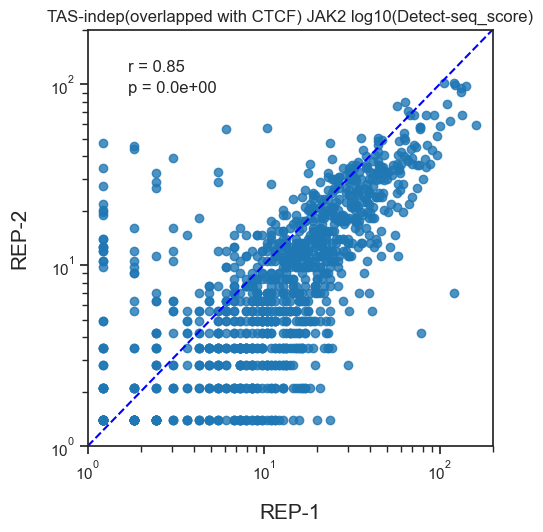

In [97]:
def plot_sns_lmplot(df, title='notitle', xlabel=None, ylabel=None):
    sns.set_theme(style="ticks", palette=None)

    df.columns = ['REP-1', 'REP-2']
    r_statistic, p_value = scipy.stats.pearsonr(x=df.iloc[:, 0], y=df.iloc[:, 1])
    g = sns.lmplot(
        data=df,x=df.columns[0], y=df.columns[1], 
        # aspect=1,
        fit_reg=False,  # If True, estimate and plot a regression model relating the x and y variables.
        line_kws={"linewidth": 1, "linestyle": 'dashed', "color": "red"},
        seed=0
    )
    # add diagonal line
    g.ax.axline((0, 0), (.8, .8), color='blue', linestyle="dashed")
    g.ax.set_xscale('log', base=10)
    g.ax.set_yscale('log', base=10)
    # g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda v, _: '{:g}'.format(v)))
    # g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, _: '{:g}'.format(v)))
    g.ax.annotate('r = {:.2f} '.format(r_statistic), xy=(.1, .9), xycoords=g.ax.transAxes)
    g.ax.annotate('p = {:.1e}'.format(p_value), xy=(.1, .85), xycoords=g.ax.transAxes)
    g.ax.set_xlim(1, 200)
    g.ax.set_ylim(1, 200)
    plt.title(f'{title} log10(Detect-seq_score)')
    plt.xlabel(xlabel if xlabel else df.columns[0], labelpad=15, fontsize=15)
    plt.ylabel(ylabel if ylabel else df.columns[1], labelpad=15, fontsize=15)
    g.ax.spines['top'].set_visible(True)
    g.ax.spines['right'].set_visible(True)
    g.ax.spines['bottom'].set_visible(True)
    g.ax.spines['left'].set_visible(True)
plot_sns_lmplot(df=df_tas_indep_JAK2, title='TAS-indep(overlapped with CTCF) JAK2')

/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


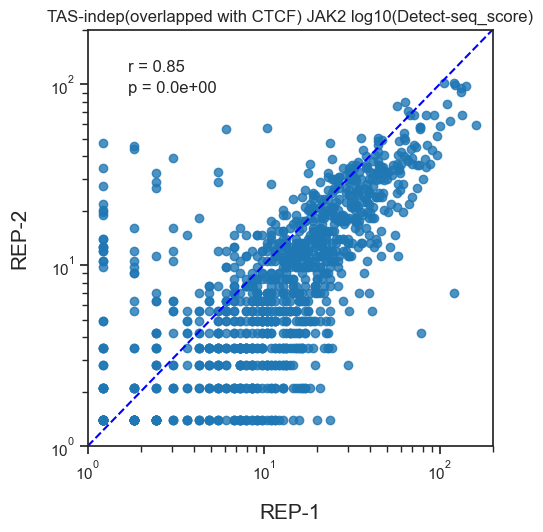

In [98]:
plot_sns_lmplot(df=df_tas_indep_JAK2, title='TAS-indep(overlapped with CTCF) JAK2')

/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


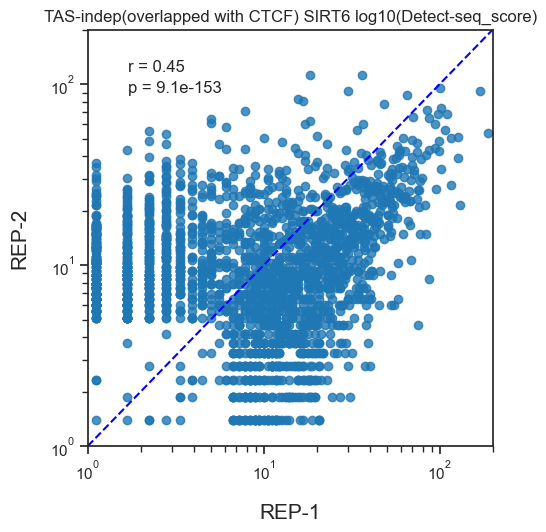

In [99]:
plot_sns_lmplot(df=df_tas_indep_SIRT6, title='TAS-indep(overlapped with CTCF) SIRT6')

/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


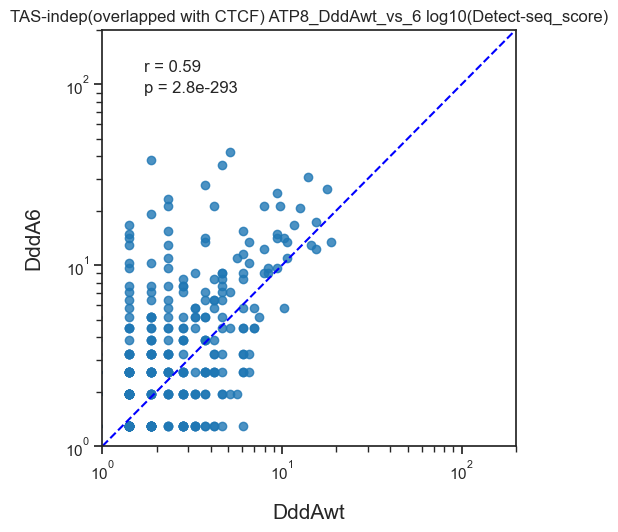

In [100]:
plot_sns_lmplot(df=df_tas_indep_ATP8_wt_6, title='TAS-indep(overlapped with CTCF) ATP8_DddAwt_vs_6', xlabel='DddAwt', ylabel='DddA6')

/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


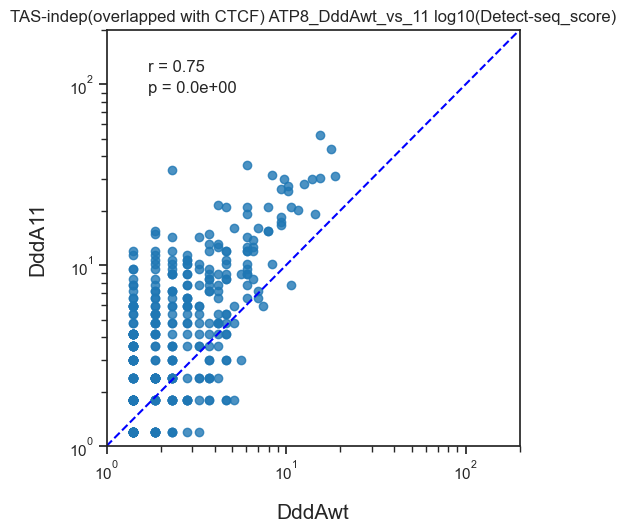

In [101]:
plot_sns_lmplot(df=df_tas_indep_ATP8_wt_11, title='TAS-indep(overlapped with CTCF) ATP8_DddAwt_vs_11', xlabel='DddAwt', ylabel='DddA11')

/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


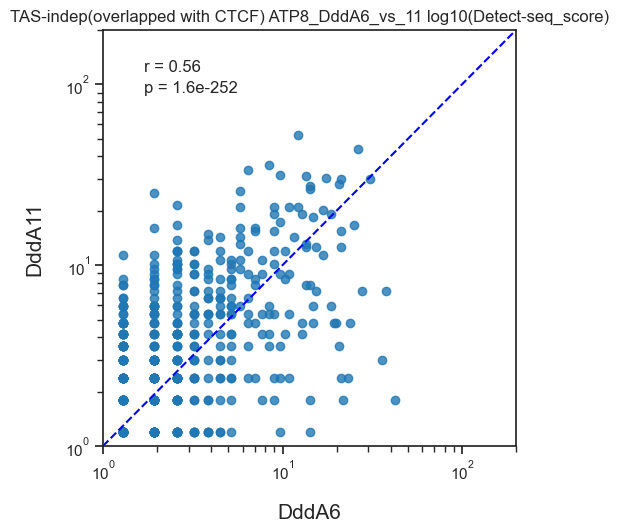

In [102]:
plot_sns_lmplot(df=df_tas_indep_ATP8_6_11, title='TAS-indep(overlapped with CTCF) ATP8_DddA6_vs_11', xlabel='DddA6', ylabel='DddA11')

/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


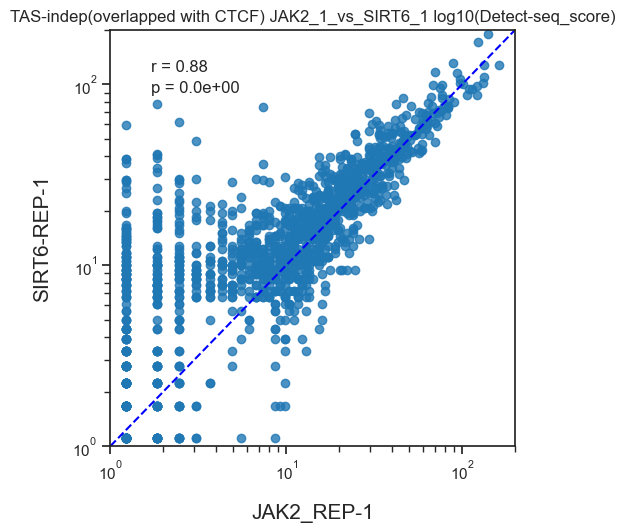

In [103]:
plot_sns_lmplot(df=df_tas_indep_JAK2_1_SIRT6_1, title='TAS-indep(overlapped with CTCF) JAK2_1_vs_SIRT6_1', xlabel='JAK2_REP-1', ylabel='SIRT6-REP-1')

/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


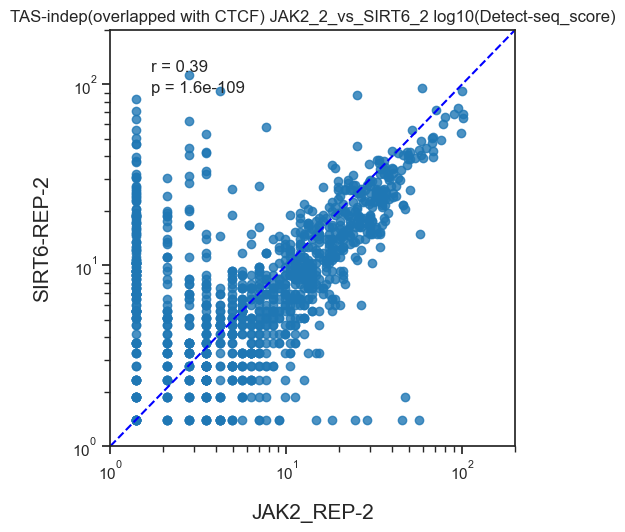

In [104]:
plot_sns_lmplot(df=df_tas_indep_JAK2_2_SIRT6_2, title='TAS-indep(overlapped with CTCF) JAK2_2_vs_SIRT6_2', xlabel='JAK2_REP-2', ylabel='SIRT6-REP-2')

### Share info now for TAS-independent

In [105]:
# df_arts_tas_indep_add_seq = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq.csv')
df_arts_tas_indep_add_seq = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq_v3.csv')

In [106]:
df_art_tas_indep_shareinfo = df_arts_tas_indep_add_seq[['region_index', '<sample>']].pivot(
    index='region_index', values='region_index', columns='<sample>'
)
# df_art_tas_indep_shareinfo.to_csv('/Users/zhaohuanan/Downloads/test.csv')
df_art_tas_indep_shareinfo

<sample>,DetectSeq_ATP8-DddA11_REP-1,DetectSeq_ATP8-DddA6_REP-1,DetectSeq_ATP8-DddAwt_REP-1,DetectSeq_JAK2-DddA11_REP-1,DetectSeq_JAK2-DddA11_REP-2,DetectSeq_SIRT6-DddA11_REP-1,DetectSeq_SIRT6-DddA11_REP-2
region_index,,,,,,,
chr10_100710753_100710783,NaN,NaN,NaN,NaN,NaN,chr10_100710753_100710783,NaN
chr10_100747051_100747100,NaN,NaN,NaN,NaN,NaN,chr10_100747051_100747100,NaN
chr10_101046784_101046816,NaN,NaN,NaN,NaN,NaN,chr10_101046784_101046816,chr10_101046784_101046816
chr10_102403971_102403990,NaN,NaN,NaN,chr10_102403971_102403990,NaN,chr10_102403971_102403990,chr10_102403971_102403990
chr10_102422557_102422570,NaN,NaN,NaN,NaN,NaN,NaN,chr10_102422557_102422570
...,...,...,...,...,...,...,...
chrX_71030636_71030684,NaN,NaN,NaN,NaN,NaN,NaN,chrX_71030636_71030684
chrX_71096729_71096749,NaN,NaN,NaN,NaN,NaN,NaN,chrX_71096729_71096749
chrX_72126743_72126762,NaN,NaN,NaN,NaN,NaN,chrX_72126743_72126762,NaN


In [107]:
df_art_tas_indep_shareinfo_bool = df_art_tas_indep_shareinfo.applymap(lambda x: True if isinstance(x, str) else False)
df_art_tas_indep_shareinfo_bool

<sample>,DetectSeq_ATP8-DddA11_REP-1,DetectSeq_ATP8-DddA6_REP-1,DetectSeq_ATP8-DddAwt_REP-1,DetectSeq_JAK2-DddA11_REP-1,DetectSeq_JAK2-DddA11_REP-2,DetectSeq_SIRT6-DddA11_REP-1,DetectSeq_SIRT6-DddA11_REP-2
region_index,,,,,,,
chr10_100710753_100710783,False,False,False,False,False,True,False
chr10_100747051_100747100,False,False,False,False,False,True,False
chr10_101046784_101046816,False,False,False,False,False,True,True
chr10_102403971_102403990,False,False,False,True,False,True,True
chr10_102422557_102422570,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
chrX_71030636_71030684,False,False,False,False,False,False,True
chrX_71096729_71096749,False,False,False,False,False,False,True
chrX_72126743_72126762,False,False,False,False,False,True,False


In [108]:
from upsetplot import UpSet, from_indicators

# from_indicators(
#         [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
#         data=df_art_tas_indep_shareinfo_bool
#     )

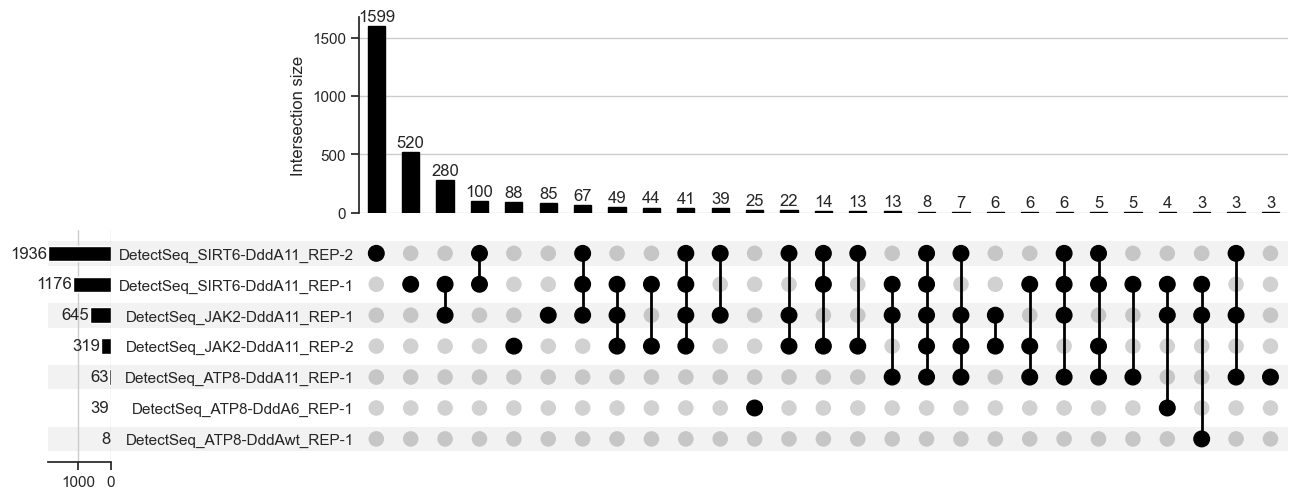

In [109]:
# UpSet(from_indicators(lambda df: df.select_dtypes(bool), data=df_art_tas_indep_shareinfo_bool))
UpSet(
    data = from_indicators(
        df_art_tas_indep_shareinfo_bool,# [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
        data=df_art_tas_indep_shareinfo_bool
    ),
        # orientation='horizontal',
    sort_by='cardinality', #{'cardinality', 'degree', '-cardinality', '-degree', 'input', '-input'}
    sort_categories_by='-cardinality', # {'cardinality', '-cardinality', 'input', '-input'}
    min_subset_size=3,
    max_subset_size=None,
    min_degree=None,
    max_degree=None,
    facecolor='auto',
    other_dots_color=0.18,
    shading_color=0.05,
    with_lines=True,
    element_size=32,
    show_counts=True,
    # show_percentages=True,
)

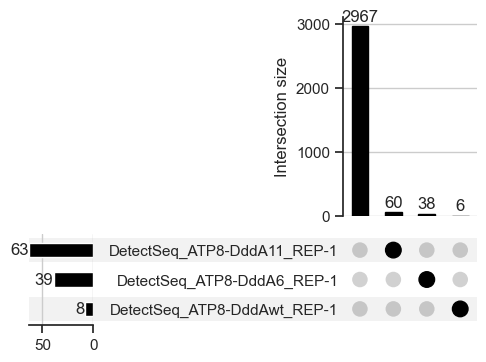

In [112]:
# UpSet(from_indicators(lambda df: df.select_dtypes(bool), data=df_art_tas_indep_shareinfo_bool))
UpSet(
    data = from_indicators(
        df_art_tas_indep_shareinfo_bool[['DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1']],# [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
        data=df_art_tas_indep_shareinfo_bool
    ),
        # orientation='horizontal',
    sort_by='cardinality', #{'cardinality', 'degree', '-cardinality', '-degree', 'input', '-input'}
    sort_categories_by='-cardinality', # {'cardinality', '-cardinality', 'input', '-input'}
    min_subset_size=3,
    max_subset_size=None,
    min_degree=None,
    max_degree=None,
    facecolor='auto',
    other_dots_color=0.18,
    shading_color=0.05,
    with_lines=True,
    element_size=32,
    show_counts=True,
    # show_percentages=True,
)

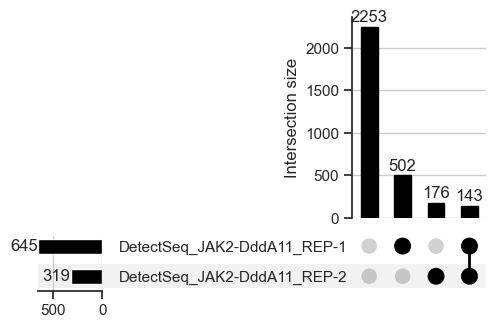

In [113]:
# UpSet(from_indicators(lambda df: df.select_dtypes(bool), data=df_art_tas_indep_shareinfo_bool))
UpSet(
    data = from_indicators(
        df_art_tas_indep_shareinfo_bool[['DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2']],# [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
        data=df_art_tas_indep_shareinfo_bool
    ),
        # orientation='horizontal',
    sort_by='cardinality', #{'cardinality', 'degree', '-cardinality', '-degree', 'input', '-input'}
    sort_categories_by='-cardinality', # {'cardinality', '-cardinality', 'input', '-input'}
    min_subset_size=3,
    max_subset_size=None,
    min_degree=None,
    max_degree=None,
    facecolor='auto',
    other_dots_color=0.18,
    shading_color=0.05,
    with_lines=True,
    element_size=32,
    show_counts=True,
    # show_percentages=True,
)

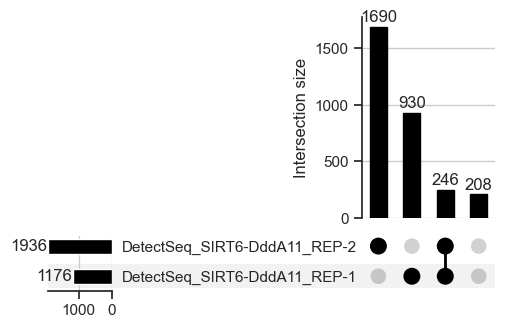

In [114]:
# UpSet(from_indicators(lambda df: df.select_dtypes(bool), data=df_art_tas_indep_shareinfo_bool))
UpSet(
    data = from_indicators(
        df_art_tas_indep_shareinfo_bool[['DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2']],# [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
        data=df_art_tas_indep_shareinfo_bool
    ),
        # orientation='horizontal',
    sort_by='cardinality', #{'cardinality', 'degree', '-cardinality', '-degree', 'input', '-input'}
    sort_categories_by='-cardinality', # {'cardinality', '-cardinality', 'input', '-input'}
    min_subset_size=3,
    max_subset_size=None,
    min_degree=None,
    max_degree=None,
    facecolor='auto',
    other_dots_color=0.18,
    shading_color=0.05,
    with_lines=True,
    element_size=32,
    show_counts=True,
    # show_percentages=True,
)

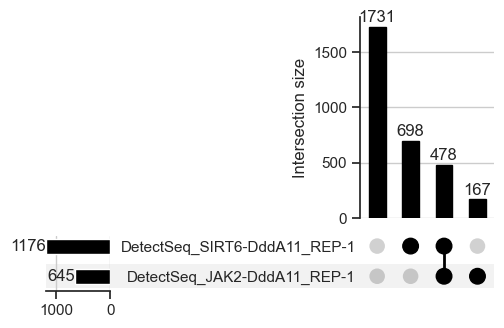

In [115]:
# UpSet(from_indicators(lambda df: df.select_dtypes(bool), data=df_art_tas_indep_shareinfo_bool))
UpSet(
    data = from_indicators(
        df_art_tas_indep_shareinfo_bool[['DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-1']],# [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
        data=df_art_tas_indep_shareinfo_bool
    ),
        # orientation='horizontal',
    sort_by='cardinality', #{'cardinality', 'degree', '-cardinality', '-degree', 'input', '-input'}
    sort_categories_by='-cardinality', # {'cardinality', '-cardinality', 'input', '-input'}
    min_subset_size=3,
    max_subset_size=None,
    min_degree=None,
    max_degree=None,
    facecolor='auto',
    other_dots_color=0.18,
    shading_color=0.05,
    with_lines=True,
    element_size=32,
    show_counts=True,
    # show_percentages=True,
)

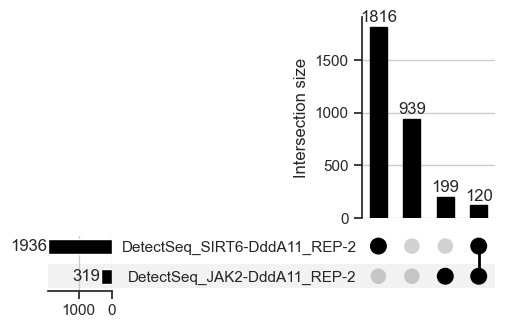

In [116]:
# UpSet(from_indicators(lambda df: df.select_dtypes(bool), data=df_art_tas_indep_shareinfo_bool))
UpSet(
    data = from_indicators(
        df_art_tas_indep_shareinfo_bool[['DetectSeq_JAK2-DddA11_REP-2', 'DetectSeq_SIRT6-DddA11_REP-2']],# [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
        data=df_art_tas_indep_shareinfo_bool
    ),
        # orientation='horizontal',
    sort_by='cardinality', #{'cardinality', 'degree', '-cardinality', '-degree', 'input', '-input'}
    sort_categories_by='-cardinality', # {'cardinality', '-cardinality', 'input', '-input'}
    min_subset_size=3,
    max_subset_size=None,
    min_degree=None,
    max_degree=None,
    facecolor='auto',
    other_dots_color=0.18,
    shading_color=0.05,
    with_lines=True,
    element_size=32,
    show_counts=True,
    # show_percentages=True,
)

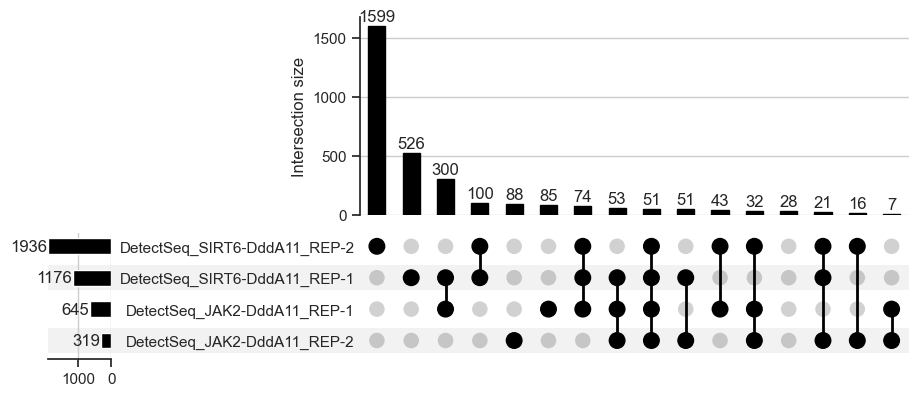

In [117]:
# UpSet(from_indicators(lambda df: df.select_dtypes(bool), data=df_art_tas_indep_shareinfo_bool))
UpSet(
    data = from_indicators(
        df_art_tas_indep_shareinfo_bool[[
            'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2', 
            'DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2'
        ]],# [i for i in df_art_tas_indep_shareinfo_bool.columns if 'ATP' not in i],
        data=df_art_tas_indep_shareinfo_bool
    ),
        # orientation='horizontal',
    sort_by='cardinality', #{'cardinality', 'degree', '-cardinality', '-degree', 'input', '-input'}
    sort_categories_by='-cardinality', # {'cardinality', '-cardinality', 'input', '-input'}
    min_subset_size=3,
    max_subset_size=None,
    min_degree=None,
    max_degree=None,
    facecolor='auto',
    other_dots_color=0.18,
    shading_color=0.05,
    with_lines=True,
    element_size=32,
    show_counts=True,
    # show_percentages=True,
)

In [118]:
# 这里的plot不能反映情况，这里需要使用scatter plot来绘制可重复性!!!

### CTCF-off and CTCF-no-off performance????? [TODO]